In [4]:
#copy files into one folder

import os
import shutil

RootDir1 = r'C:\Users\mario\ZHAW\Master\Semester_2_FS22\Applied_Data_Science\Projekt\train'
TargetFolder = r'C:\Users\mario\ZHAW\Master\Semester_2_FS22\Applied_Data_Science\Projekt\train\train_data'
for root, dirs, files in os.walk((os.path.normpath(RootDir1)), topdown=False):
        for name in files:
            if name.endswith('.jpg'):
                print("Found")
                SourceFolder = os.path.join(root,name)
                shutil.copy2(SourceFolder, TargetFolder)

Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Foun

Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Foun

Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Foun

SameFileError: 'C:\\Users\\mario\\ZHAW\\Master\\Semester_2_FS22\\Applied_Data_Science\\Projekt\\train\\Car\\Ambulance_1001.jpg' and 'C:\\Users\\mario\\ZHAW\\Master\\Semester_2_FS22\\Applied_Data_Science\\Projekt\\train\\car\\Ambulance_1001.jpg' are the same file

In [13]:
# Identify Image Resolutions

# Import Packages
import pandas as pd
import matplotlib.pyplot  as plt
from PIL import Image
from pathlib import Path
import imagesize
import numpy as np

path = r"C:\Users\mario\ZHAW\Master\Semester_2_FS22\Applied_Data_Science\Projekt\train\train_data"

# Get the Image Resolutions
imgs = [img.name for img in Path(path).iterdir() if img.suffix == ".jpg"]
img_meta = {}
for f in imgs: img_meta[str(f)] = imagesize.get(path+ '\\' +f)

# Convert it to Dataframe and compute aspect ratio
img_meta_df = pd.DataFrame.from_dict([img_meta]).T.reset_index().set_axis(['FileName', 'Size'], axis='columns', inplace=False)
img_meta_df[["Width", "Height"]] = pd.DataFrame(img_meta_df["Size"].tolist(), index=img_meta_df.index)
img_meta_df["Aspect Ratio"] = round(img_meta_df["Width"] / img_meta_df["Height"], 2)

print(f'Total Nr of Images in the dataset: {len(img_meta_df)}')
img_meta_df.head()

Total Nr of Images in the dataset: 10693


,FileName,Size,Width,Height,Aspect Ratio
0,Ambulance_1001.jpg,"(1292, 679)",1292,679,1.90
1,Ambulance_1002.jpg,"(1898, 1220)",1898,1220,1.56
2,Ambulance_1003.jpg,"(1082, 773)",1082,773,1.40
3,Ambulance_1004.jpg,"(2955, 2102)",2955,2102,1.41
4,Ambulance_1005.jpg,"(1945, 789)",1945,789,2.47


Text(0, 0.5, 'Height')

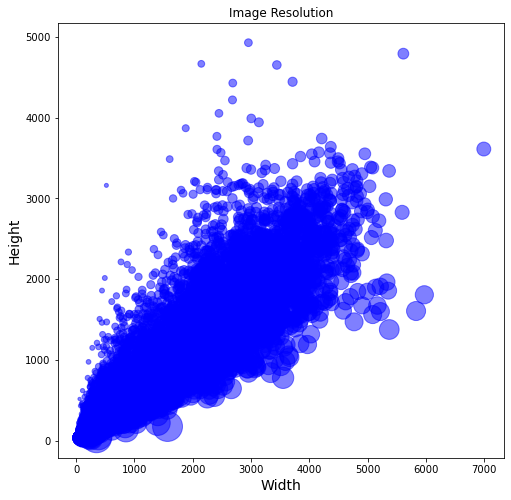

In [14]:
# Visualize Image Resolutions

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
points = ax.scatter(img_meta_df.Width, img_meta_df.Height, color='blue', alpha=0.5, s=img_meta_df["Aspect Ratio"]*100, picker=True)
ax.set_title("Image Resolution")
ax.set_xlabel("Width", size=14)
ax.set_ylabel("Height", size=14)

Text(0, 0.5, 'Height')

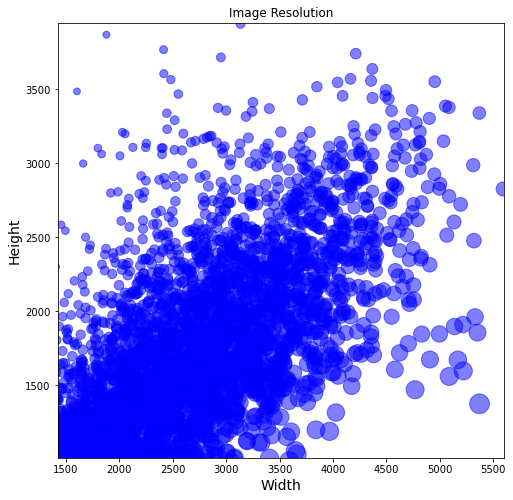

In [21]:
# Visualize Image Resolutions zoomed to find optimal image size

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.margins(x=-0.2, y=-0.2)
points = ax.scatter(img_meta_df.Width, img_meta_df.Height, color='blue', alpha=0.5, s=img_meta_df["Aspect Ratio"]*100, picker=True)
ax.set_title("Image Resolution")
ax.set_xlabel("Width", size=14)
ax.set_ylabel("Height", size=14)

In [23]:
#copy files into backup folder

RootDir1 = r'C:\Users\mario\ZHAW\Master\Semester_2_FS22\Applied_Data_Science\Projekt\train\train_data'
TargetFolder = r'C:\Users\mario\ZHAW\Master\Semester_2_FS22\Applied_Data_Science\Projekt\backup'
for root, dirs, files in os.walk((os.path.normpath(RootDir1)), topdown=False):
        for name in files:
            if name.endswith('.jpg'):
                print("Found")
                SourceFolder = os.path.join(root,name)
                shutil.copy2(SourceFolder, TargetFolder)

Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Foun

Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Foun

Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Foun

Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Foun

Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Foun

Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Foun

Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Foun

Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Foun

In [24]:
#crop images to optimal size
from PIL import Image
import os.path, sys

path = r"C:\Users\mario\ZHAW\Master\Semester_2_FS22\Applied_Data_Science\Projekt\train\train_data"
dirs = os.listdir(path)

def crop():
    for item in dirs:
        fullpath = os.path.join(path,item)         
        if os.path.isfile(fullpath):
            im = Image.open(fullpath)
            f, e = os.path.splitext(fullpath)
            imCrop = im.resize((1500, 2000)) 
            #imCrop.save(f, "JPG", quality=100)

crop()

In [25]:
#zip the images to upload them into cluster

output_filename = "vehicledata"
dir_name = r"C:\Users\mario\ZHAW\Master\Semester_2_FS22\Applied_Data_Science\Projekt\train\train_data"
shutil.make_archive(output_filename, 'zip', dir_name)

'C:\\Users\\mario\\ZHAW\\Master\\Semester_2_FS22\\Applied_Data_Science\\Projekt\\zhaw_applieddatascience\\vehicledata.zip'